In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("3_classes_processed_data.csv")

In [87]:
# Encode categorical variables
#label_encoders = {}
#for column in ['ductility']:
#    label_encoders[column] = LabelEncoder()
#    df[column] = label_encoders[column].fit_transform(df[column])
df.loc[df['ductility'] == 'pre_code','ductility']=0
df.loc[df['ductility'] == 'low_code','ductility']=1
df.loc[df['ductility'] == 'medium_code','ductility']=2
df.loc[df['ductility'] == 'high_code','ductility']=3
df['ductility'] = df['ductility'].astype(int)

df = pd.get_dummies(df, columns=['roof', 'relative_position'], drop_first=True)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [88]:
# Define features and target
X = df.drop(columns=['structural_system'])
y = df['structural_system']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**Only class weight:**

In [89]:
# Initialize and train the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', multi_class='multinomial')
log_reg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7807807807807807
Classification Report:
              precision    recall  f1-score   support

          CR       0.69      0.75      0.72        56
           M       0.95      0.77      0.85       252
     M99/ADO       0.37      1.00      0.54        25

    accuracy                           0.78       333
   macro avg       0.67      0.84      0.70       333
weighted avg       0.86      0.78      0.80       333



/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


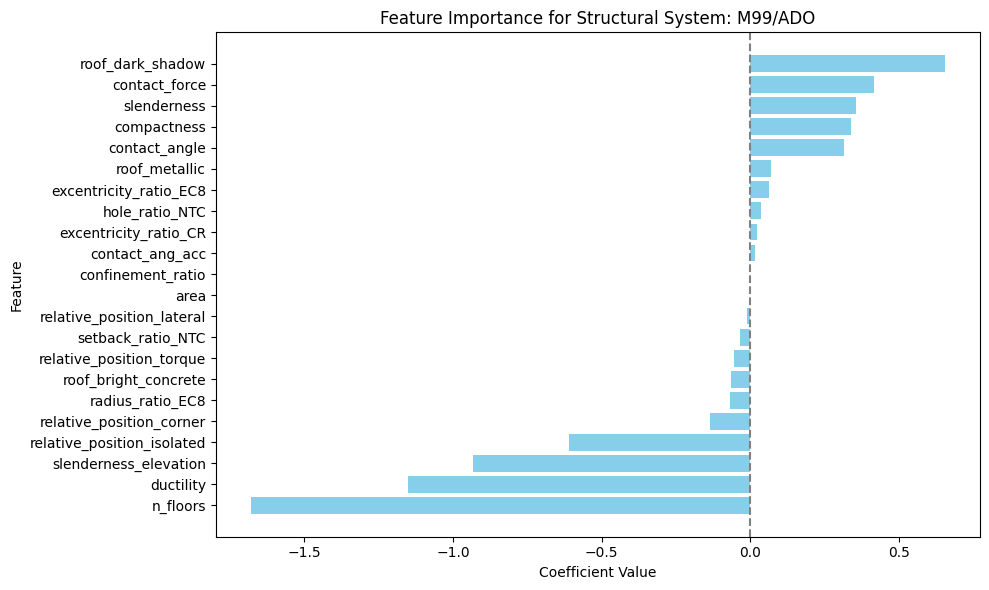

In [97]:
# Get class names and feature names
classes = log_reg_classifier.classes_
feature_names = X_train.columns

# Get the coefficients
coefficients = log_reg_classifier.coef_

# Choose a class to visualize (e.g., the first one)
target_class_index = 2
target_class_name = classes[target_class_index]
class_coefs = coefficients[target_class_index]

# Create a DataFrame for plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': class_coefs
}).sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.title(f"Feature Importance for Structural System: {target_class_name}")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Class weight + SMOTE:**

In [100]:
# Initialize and train the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')#,class_weight='balanced')
log_reg_classifier.fit(X_train_res, y_train_res)

# Make predictions
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8048048048048048
Classification Report:
              precision    recall  f1-score   support

          CR       0.73      0.68      0.70        56
           M       0.91      0.84      0.87       252
     M99/ADO       0.38      0.72      0.50        25

    accuracy                           0.80       333
   macro avg       0.67      0.75      0.69       333
weighted avg       0.84      0.80      0.82       333



/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Raw data - no resampling technique:**

In [94]:
# Initialize and train the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
log_reg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8618618618618619
Classification Report:
              precision    recall  f1-score   support

          CR       0.92      0.59      0.72        56
           M       0.87      0.97      0.92       252
     M99/ADO       0.60      0.36      0.45        25

    accuracy                           0.86       333
   macro avg       0.80      0.64      0.69       333
weighted avg       0.86      0.86      0.85       333



/home/miguel/python_envs/classifier/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
